## Importing libraries

In [1]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from math import sqrt
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

## Importing training dataset

In [2]:
#creating dataframe object
df = pd.read_csv(R'winequalityN.csv')
print("Size :",df.shape)
columns = df.columns
columns

Size : (6497, 13)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# dataset
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Exploratory data analysis

## Removing duplicate values 

In [6]:
data_unique = df.copy()
print("Size of dataset Before & After -->")
print("Before : "+str(data_unique.shape))
data_unique.drop_duplicates(keep = 'first', inplace = True)
print("After : "+str(data_unique.shape))
data_unique.head()
# df = data_unique

Size of dataset Before & After -->
Before : (6497, 13)
After : (5329, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## Finding Null values and Removing them

In [7]:
percent = df.isnull().sum()/df.isnull().count()*100
total = df.isnull().sum().sort_values(ascending=False)
percent_sorted = (round(percent, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_sorted], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
fixed acidity,10,0.15
pH,9,0.14
volatile acidity,8,0.12
sulphates,4,0.06
citric acid,3,0.05
chlorides,2,0.03
residual sugar,2,0.03
quality,0,0.00
alcohol,0,0.00
density,0,0.00


In [8]:
# removing null values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [9]:
percent = df.isnull().sum()/df.isnull().count()*100
total = df.isnull().sum().sort_values(ascending=False)
percent_sorted = (round(percent, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_sorted], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
quality,0,0.0
alcohol,0,0.0
sulphates,0,0.0
pH,0,0.0
density,0,0.0
total sulfur dioxide,0,0.0
free sulfur dioxide,0,0.0
chlorides,0,0.0
residual sugar,0,0.0
citric acid,0,0.0


## Finding extreme values 

In [10]:
df_copy = df.copy()
df_copy
min_col = {}
max_col = {}
for col in columns:
    max_col[col]= df_copy[col].max()
    min_col[col]= df_copy[col].min()
result = pd.DataFrame([min_col, max_col], index = ['Minimum', 'Maximum']).transpose()
result

,Minimum,Maximum
type,red,white
fixed acidity,3.8,15.9
volatile acidity,0.08,1.58
citric acid,0,1.66
residual sugar,0.6,65.8
chlorides,0.009,0.611
free sulfur dioxide,1,289
total sulfur dioxide,6,440
density,0.98711,1.03898
pH,2.72,4.01


## Finding uniques values 

In [11]:
df_copy = df.copy()
df_copy
values = {}
max_col = {}
for col in columns:
    unique_values = df_copy[col].unique()
    values[col] = unique_values if unique_values.size < 10 else unique_values.size
result = pd.DataFrame([values], index = ['Unique Values']).transpose()
result

,Unique Values
type,"[white, red]"
fixed acidity,107
volatile acidity,188
citric acid,90
residual sugar,317
chlorides,215
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,109


# Exploratory Data Visualiztion

## Finding Outliers

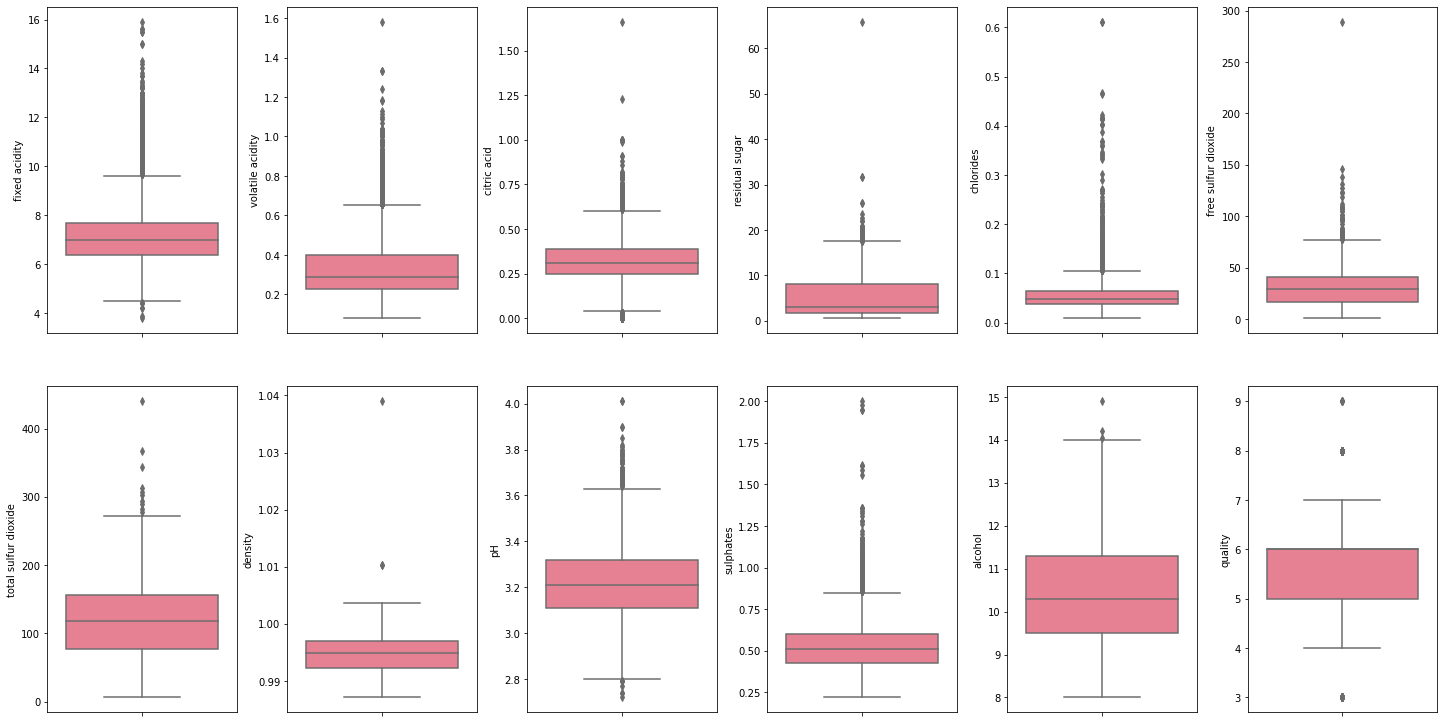

In [12]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index], palette="husl")
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Distribution of values 

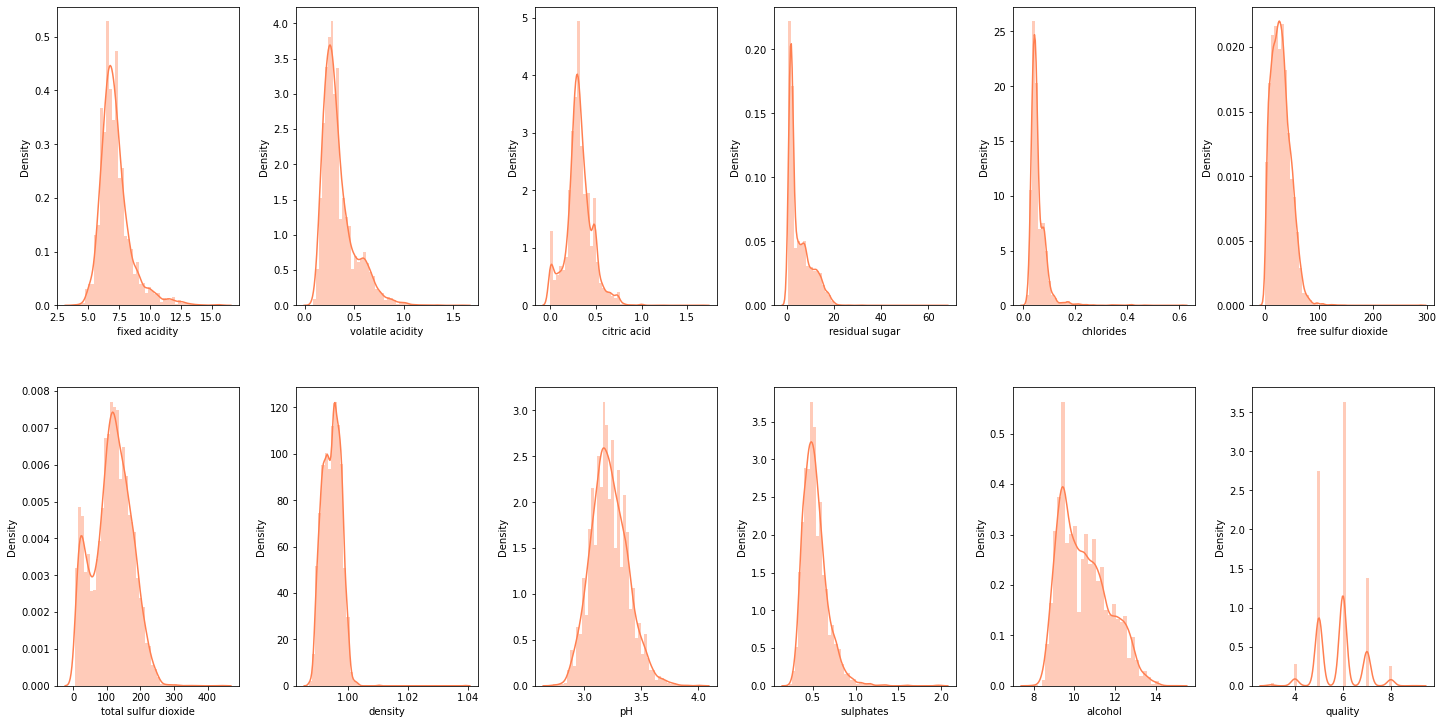

In [13]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index], hist=True, color="coral")
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [14]:
# log transformation we can use this to show standard scaler concept so 1 max 2 should be enough
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

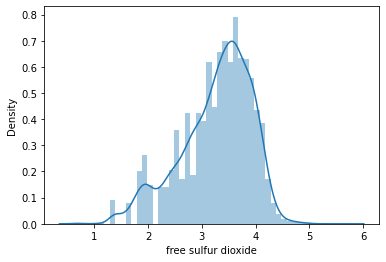

In [15]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

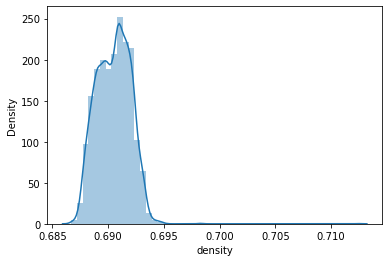

In [16]:
df['density'] = np.log(1 + df['density'])
sns.distplot(df['density'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

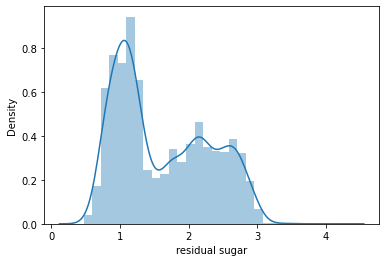

In [17]:
df['residual sugar'] = np.log(1 + df['residual sugar'])
sns.distplot(df['residual sugar'])

<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

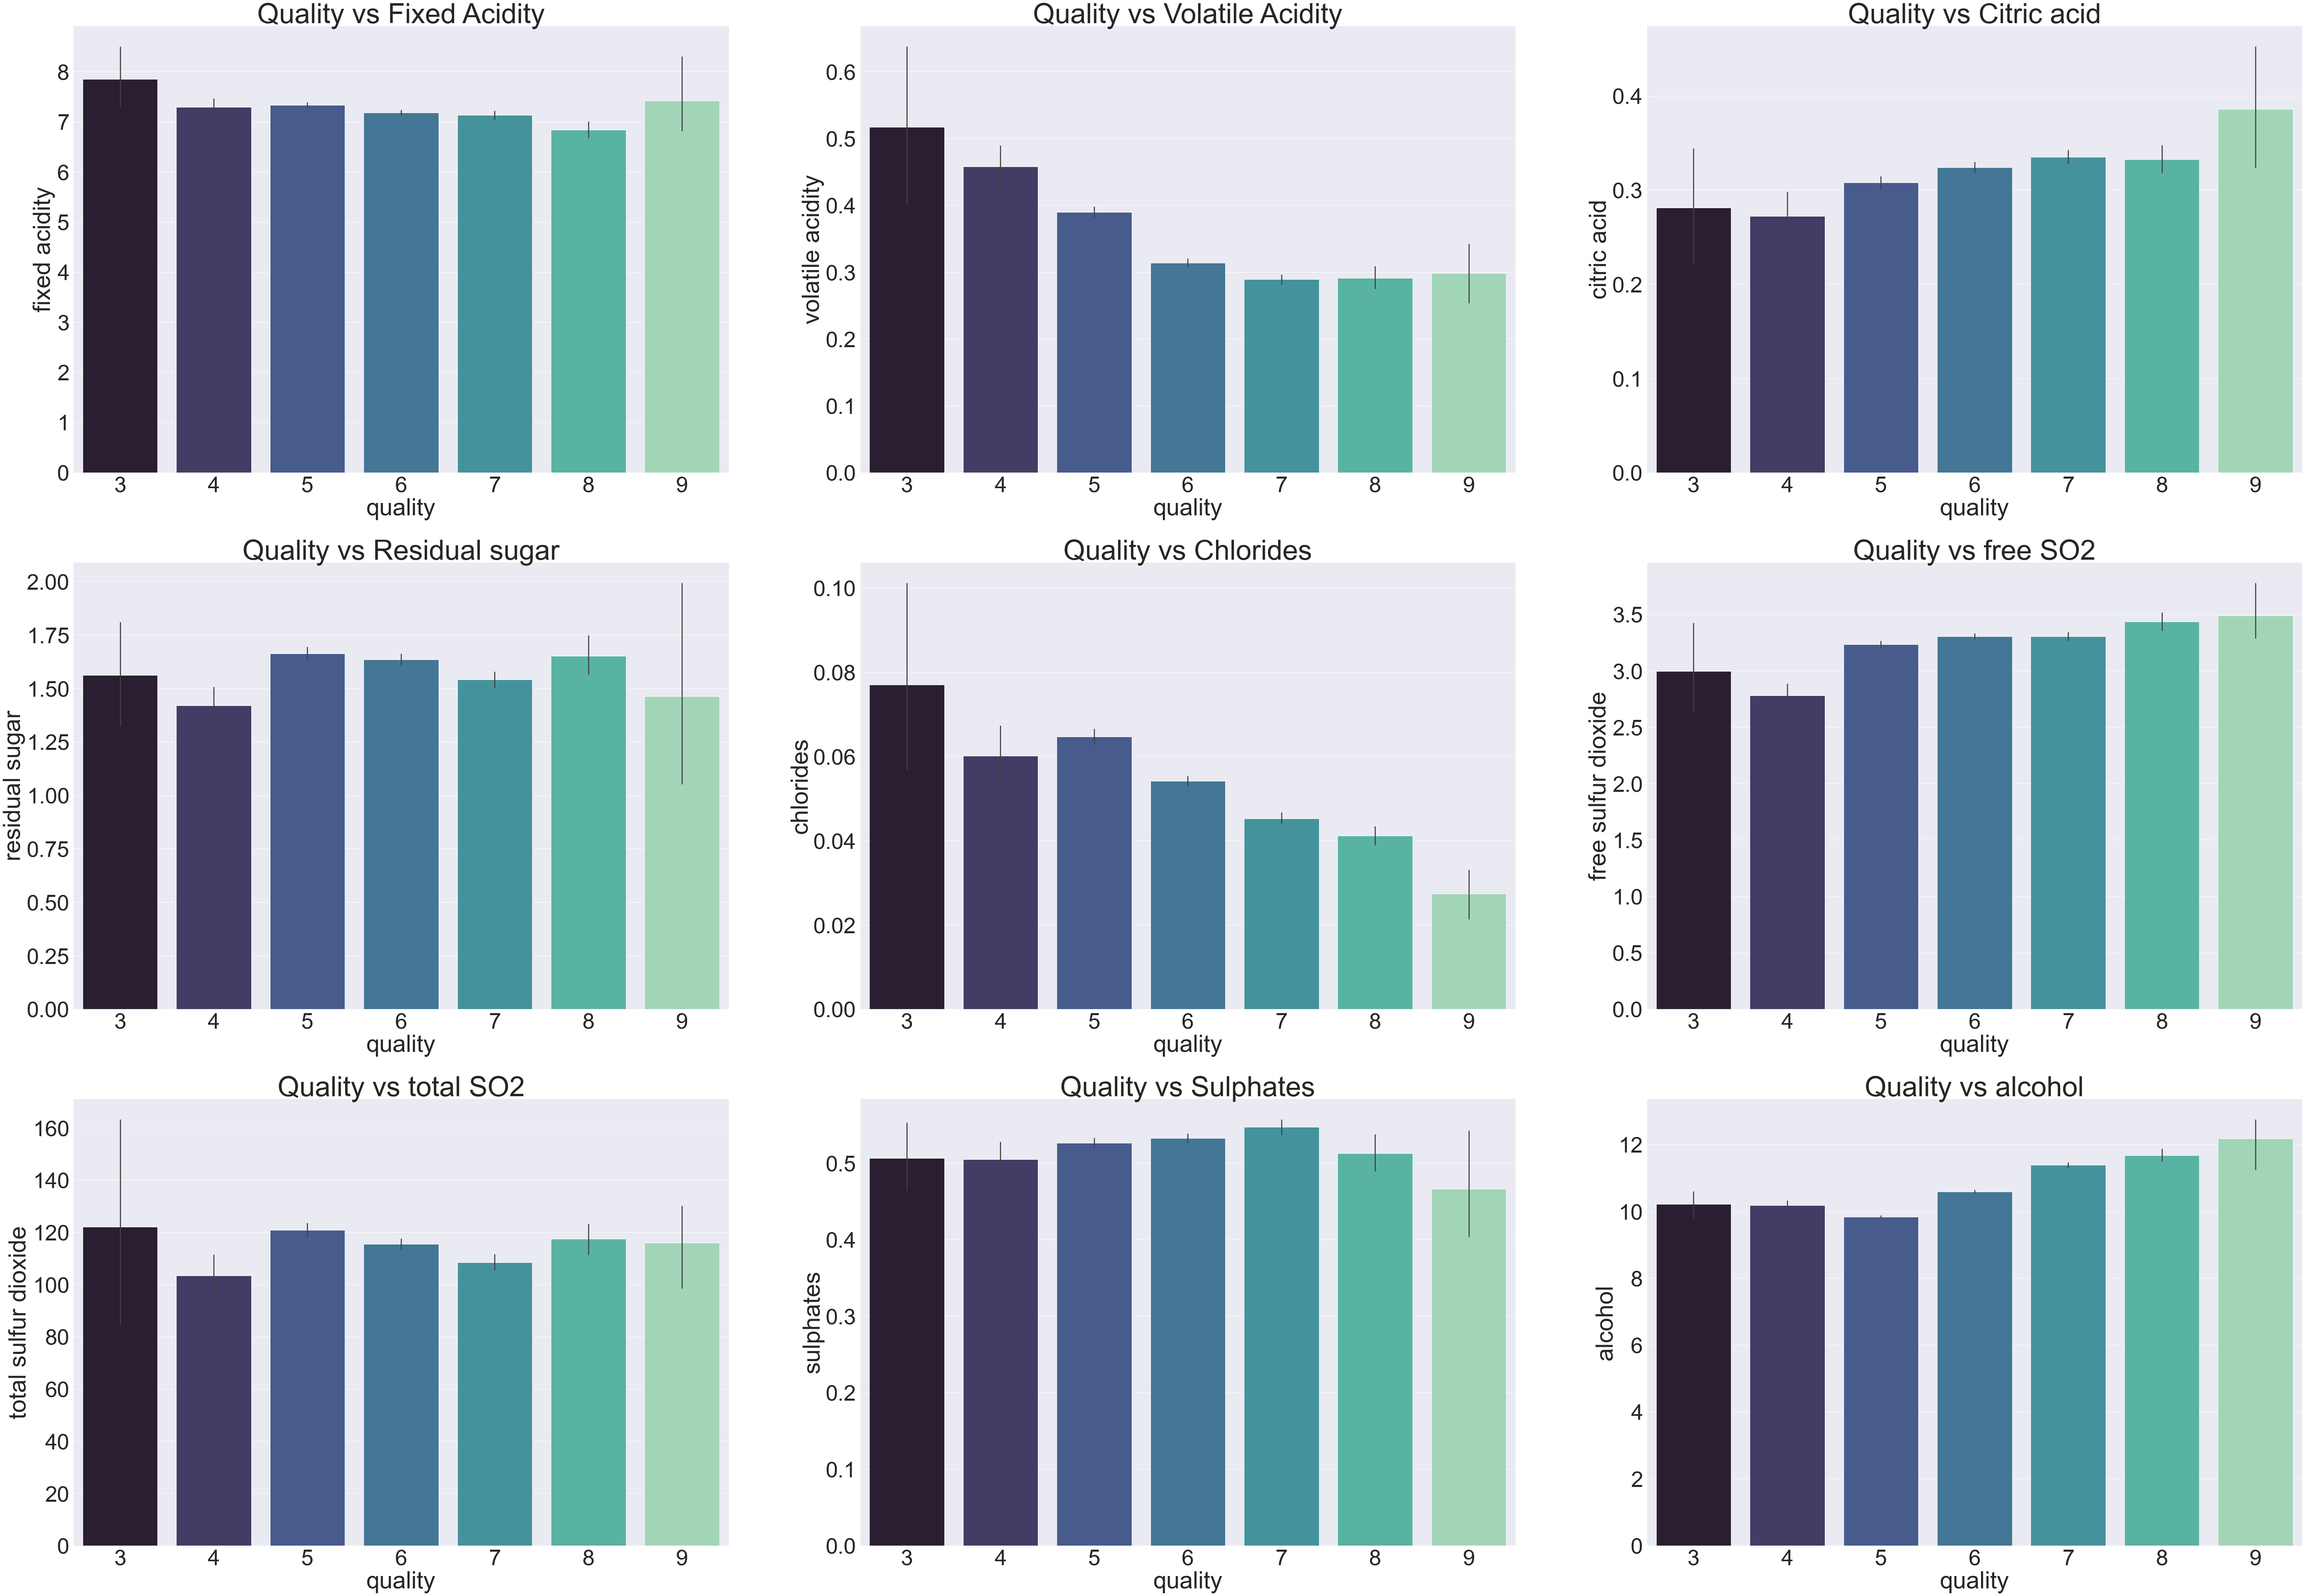

In [18]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df, palette = "mako")

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df, palette = "mako")

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df, palette = "mako")

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df, palette = "mako")

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df, palette = "mako")

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df, palette = "mako")

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df, palette = "mako")

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df, palette = "mako")

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette = "mako")

<AxesSubplot:xlabel='type', ylabel='count'>

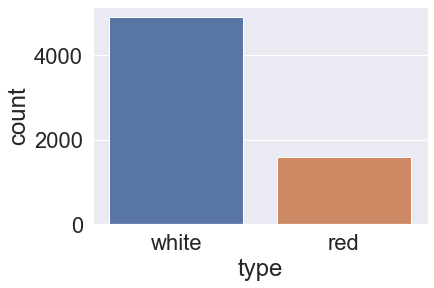

In [19]:
sns.set(font_scale=2)
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

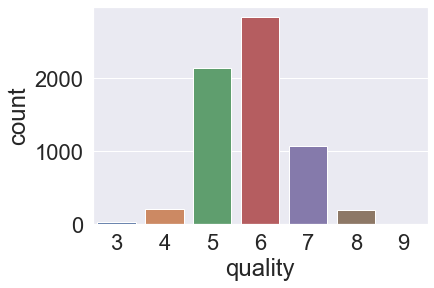

In [20]:
sns.countplot(df['quality'])

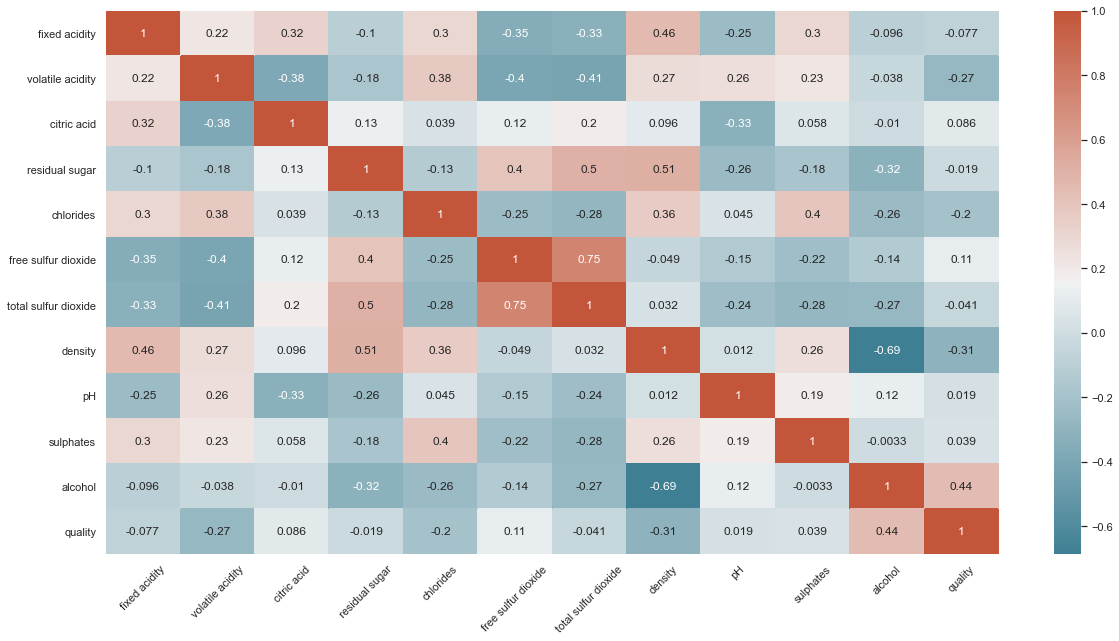

In [21]:
sns.set(font_scale=1)
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.xticks(rotation=45)
plt.show()

## Checking if we can find clusters of data

In [22]:
y = df['quality']
X = df.drop(['type','quality'], axis=1)

In [23]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X['cluster'] = y


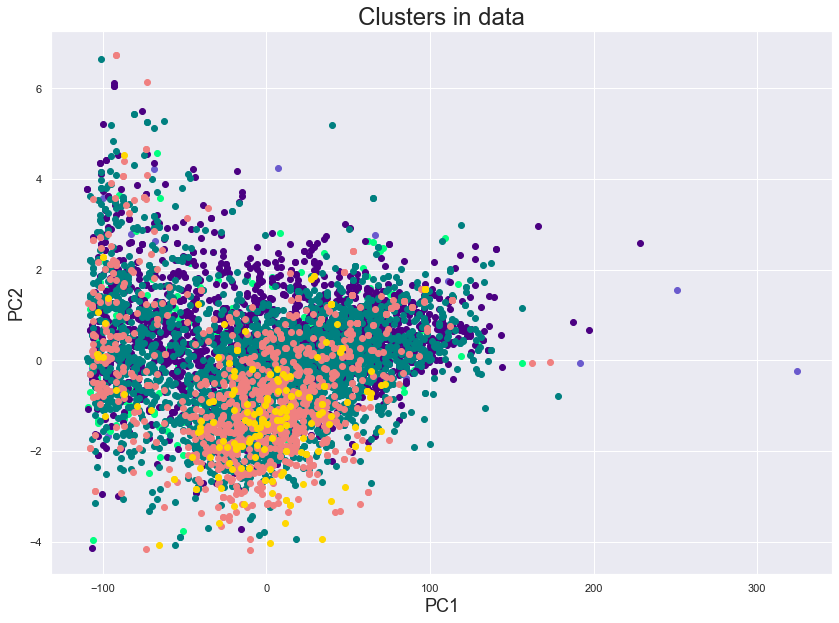

In [24]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=1)
colours = ['slateblue', 'springgreen', 'indigo', 'teal', 'lightcoral', 'gold', 'cyan']
for i in range(3, 9):
    plt.scatter(reduced_X[reduced_X['cluster'] == i].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == i].loc[:, 'PC2'], color=colours[i-3])

plt.title("Clusters in data", fontsize = 24)
plt.xlabel("PC1", fontsize = 18)
plt.ylabel("PC2", fontsize = 18)
plt.show()

# Data Preprocessing 

## Label encoding quality classes

In [25]:
classes = ['bad','good', 'excellent']
df['quality_label'] = [classes[2] if x >= 7 else (classes[1] if x > 4 and x < 7 else classes[0]) for x in df['quality']]

label_quality = LabelEncoder()
df['quality_cluster'] = label_quality.fit_transform(df['quality_label'])
df['quality_cluster'].value_counts()

# df.sort_values(by=['sulphates']).head(10)

2    4974
1    1277
0     246
Name: quality_cluster, dtype: int64

In [26]:
X = df.drop(columns=['type', 'quality','quality_label','quality_cluster'])
y = df['quality_cluster']

## Standard Scaling 

In [27]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Model Selection

In [28]:
results = pd.DataFrame(index = ['Model', 'Accuracy (%)', 'Mean (%)', 'Standard Deviation (%)'])

## Logistic Regression:

In [29]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc = round(logreg.score(X_test, y_test) * 100, 2)
scores = cross_val_score(logreg, X_test, y_test, cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)

results[0] = ['Logistic Regression', acc, mean, std]

## Gaussian Naive Bayes:

In [30]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

acc = round(gaussian.score(X_test, y_test) * 100, 2)
scores = cross_val_score(gaussian, X_test, y_test,  cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)

results[1] = ['Gaussian Naive Bayes', acc, mean, std]

## K Nearest Neighbor:

In [31]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

acc = round(knn.score(X_test, y_test) * 100, 2)
scores = cross_val_score(knn, X_test, y_test,  cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)

results[2] = ['K Nearest Neighbor', acc, mean, std]

## Decision Tree

In [32]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  

acc = round(decision_tree.score(X_test, y_test) * 100, 2)
scores = cross_val_score(decision_tree, X_test, y_test,  cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)

results[3] = ['Decision Tree', acc, mean, std]

## Random Forest 

In [33]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

acc = round(random_forest.score(X_test, y_test) * 100, 2)
scores = cross_val_score(random_forest, X_test, y_test,  cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)
results[4] = ['Random Forest', acc, mean, std]

## Multi-layer Perceptron 

In [34]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

mlpPerceptron = MLPClassifier(hidden_layer_sizes = (50, 50, 50), max_iter=100)
mlpPerceptron.fit(X_train, y_train)

acc = round(mlpPerceptron.score(X_train, y_train) * 100, 2)
scores = cross_val_score(mlpPerceptron, X_test, y_test, cv=5)
mean = round(scores.mean()*100, 2)
std = round(scores.std()*100, 2)

results[5] = ['Multi-layer Perceptron', acc, mean, std]

## Accuracy Results

In [35]:
results = results.T
results = results.sort_values(by=['Accuracy (%)', 'Mean (%)'] , ascending=False)
results = results.set_index('Model')
results

,Accuracy (%),Mean (%),Standard Deviation (%)
Model,,,
Random Forest,84.69,81.54,0.73
K Nearest Neighbor,79.54,76.77,2.37
Logistic Regression,78.38,79,1.32
Decision Tree,78.08,73,1.74
Multi-layer Perceptron,77.31,76.85,0.29
Gaussian Naive Bayes,73.23,70.62,2.21


# Fianalizing Model

In [36]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Hyperparameter Tuning 

In [37]:
# Parameteres
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
                'criterion': ['gini', 'entropy']}

# Tuning
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

# Best Parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.9min finished


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

## Base Model 

In [43]:
# base_model = RandomForestClassifier(**rf_random.best_params_, oob_score=True)
base_model = RandomForestClassifier(n_estimators= 600,
                                     min_samples_split= 5,
                                     min_samples_leaf= 2,
                                     max_features= 'auto',
                                     max_depth= None,
                                     criterion= 'gini',
                                     bootstrap= True,
                                    oob_score=True)

base_model.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [44]:
scores = cross_val_score(base_model, X_test, y_test)
predictions = cross_val_predict(base_model, X_train, y_train)

print("Model Score")
print("Accuracy : ", round(base_model.score(X_test, y_test) * 100, 2) , "%")
print('Average Error: {:0.2f} degrees.'.format(np.mean(abs(predictions - y_train))))
print("K-Fold Cross Validation (Mean Accuracy) : ",round(scores.mean() * 100, 2) , "%")
print("K-Fold Cross Validation (Standard Devition) : ",round(scores.std() * 100, 2), "%")

print("OOB score:", round(base_model.oob_score_, 4)*100, "%")
print("Precision : ", round(precision_score(y_train, predictions, pos_label='positive', average='micro') * 100, 2) , "%")
print("Recall : ",round(recall_score(y_train, predictions, pos_label='positive', average='micro'), 4)  * 100, "%")
print("F1 Score : ",round(f1_score(y_train, predictions, pos_label='positive', average='micro'), 2)  * 100, "%")
confusion_matrix(y_train, predictions)

Model Score
Accuracy :  84.08 %
Average Error: 0.20 degrees.
K-Fold Cross Validation (Mean Accuracy) :  81.31 %
K-Fold Cross Validation (Standard Devition) :  1.25 %
OOB score: 84.82 %
Precision :  83.95 %
Recall :  83.95 %
F1 Score :  84.0 %


array([[   1,    0,  197],
       [   0,  534,  490],
       [   0,  147, 3828]], dtype=int64)

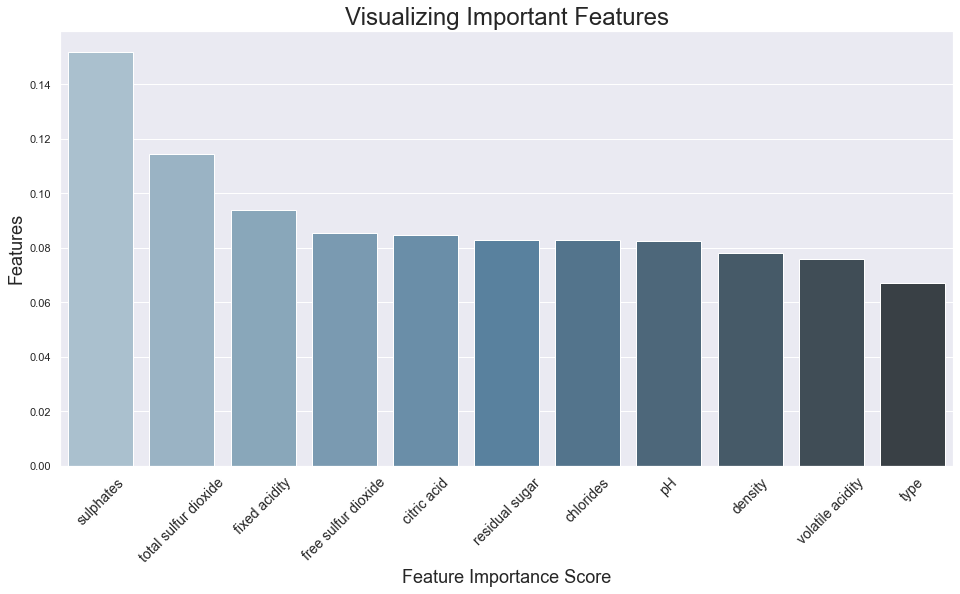

In [45]:
feature_imp = pd.Series(base_model.feature_importances_, index=df.columns[:11]).sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(y=feature_imp, x=feature_imp.index, palette="Blues_d", saturation=.5)

plt.xlabel('Feature Importance Score', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Visualizing Important Features", fontsize=24)
plt.xticks(rotation=45, fontsize=14)
plt.show()